# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

In [ ]:
#Some cells are empty but the job is done in other aside cells.

#Import Library

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [10]:
data = pd.read_csv('bank-full.csv', sep=';')

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

target_column = "y"

X = data.drop(columns=target_column)
y = data[target_column]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


#Normalize data
normalize numerical data.

In [ ]:
# Normalize numerical data

# Create Data Loader
create data loader for pytorch

In [ ]:
#TODO

#Model
define your model in here

In [11]:
import torch.nn.functional as F
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
      
        self.fc1 = nn.Linear(X_train.shape[1], 64) 
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 2)  

    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = BankMarketingNet()


print(model)

BankMarketingNet(
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=2, bias=True)
)


#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

Epoch 1/20 - Train Loss: 0.2669 - Validation Loss: 0.2393
Epoch 2/20 - Train Loss: 0.2362 - Validation Loss: 0.2321
Epoch 3/20 - Train Loss: 0.2306 - Validation Loss: 0.2384
Epoch 4/20 - Train Loss: 0.2276 - Validation Loss: 0.2341
Epoch 5/20 - Train Loss: 0.2241 - Validation Loss: 0.2332
Epoch 6/20 - Train Loss: 0.2208 - Validation Loss: 0.2292
Epoch 7/20 - Train Loss: 0.2186 - Validation Loss: 0.2269
Epoch 8/20 - Train Loss: 0.2162 - Validation Loss: 0.2253
Epoch 9/20 - Train Loss: 0.2134 - Validation Loss: 0.2247
Epoch 10/20 - Train Loss: 0.2112 - Validation Loss: 0.2255
Epoch 11/20 - Train Loss: 0.2095 - Validation Loss: 0.2250
Epoch 12/20 - Train Loss: 0.2076 - Validation Loss: 0.2227
Epoch 13/20 - Train Loss: 0.2063 - Validation Loss: 0.2243
Epoch 14/20 - Train Loss: 0.2043 - Validation Loss: 0.2240
Epoch 15/20 - Train Loss: 0.2031 - Validation Loss: 0.2244
Epoch 16/20 - Train Loss: 0.2016 - Validation Loss: 0.2276
Epoch 17/20 - Train Loss: 0.1991 - Validation Loss: 0.2283
Epoch 

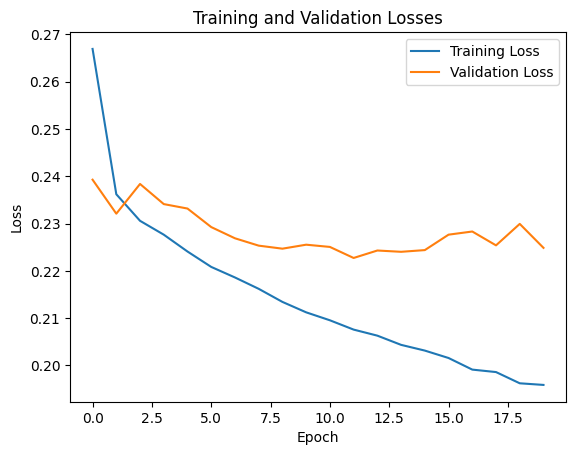

In [12]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 20


train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")


torch.save(model.state_dict(), 'bank_marketing_model.pth')

print("Training Losses:", train_losses)
print("Validation Losses:", val_losses)

# Plotting the training and validation losses
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

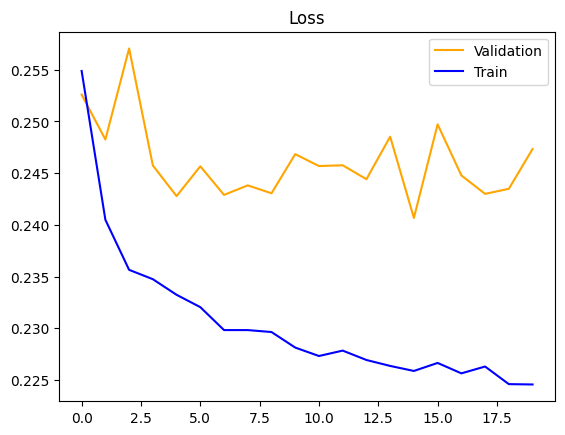

In [ ]:
#TODO

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [13]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())


accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_matrix)


class_report = classification_report(all_labels, all_preds)
print('Classification Report:')
print(class_report)


Test Accuracy: 0.9024
Confusion Matrix:
[[5784  205]
 [ 457  336]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5989
           1       0.62      0.42      0.50       793

    accuracy                           0.90      6782
   macro avg       0.77      0.69      0.72      6782
weighted avg       0.89      0.90      0.89      6782

